### One-word-in and one-word-out Sequence

### Line-by-line Sequence

In [75]:
from numpy import array
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding



### Text

In [76]:
text = """ My name is Hasan\n
I am a CSE engineer\n 
I completed my B.Sc in CSE from Leading University\n
Now I am working at Messrs Ma Moni Traders as a Data Analyst\n """

### tokenizer

In [77]:
# prepare the tokenizer on the source text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

### vocabulary size

In [78]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 27


### word to word sequence

In [79]:
# create line-based sequences
sequences = list()
for line in text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
        
print('Total Sequences: %d' % len(sequences))


Total Sequences: 28


In [80]:
sequences

[[2, 6],
 [2, 6, 7],
 [2, 6, 7, 8],
 [1, 3],
 [1, 3, 4],
 [1, 3, 4, 5],
 [1, 3, 4, 5, 9],
 [1, 10],
 [1, 10, 2],
 [1, 10, 2, 11],
 [1, 10, 2, 11, 12],
 [1, 10, 2, 11, 12, 13],
 [1, 10, 2, 11, 12, 13, 5],
 [1, 10, 2, 11, 12, 13, 5, 14],
 [1, 10, 2, 11, 12, 13, 5, 14, 15],
 [1, 10, 2, 11, 12, 13, 5, 14, 15, 16],
 [17, 1],
 [17, 1, 3],
 [17, 1, 3, 18],
 [17, 1, 3, 18, 19],
 [17, 1, 3, 18, 19, 20],
 [17, 1, 3, 18, 19, 20, 21],
 [17, 1, 3, 18, 19, 20, 21, 22],
 [17, 1, 3, 18, 19, 20, 21, 22, 23],
 [17, 1, 3, 18, 19, 20, 21, 22, 23, 24],
 [17, 1, 3, 18, 19, 20, 21, 22, 23, 24, 4],
 [17, 1, 3, 18, 19, 20, 21, 22, 23, 24, 4, 25],
 [17, 1, 3, 18, 19, 20, 21, 22, 23, 24, 4, 25, 26]]

### Max length and Sequence

In [81]:
# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding= 'pre')
print( 'Max Sequence Length: %d ' % max_length)

Max Sequence Length: 13 


### Spliting data

In [82]:
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

### Model

In [83]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))


In [84]:
# summarize defined model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 12, 10)            270       
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 27)                1377      
Total params: 13,847
Trainable params: 13,847
Non-trainable params: 0
_________________________________________________________________


In [85]:
# compile network
model.compile(loss= 'categorical_crossentropy', 
              optimizer= 'adam', 
              metrics=['accuracy'])

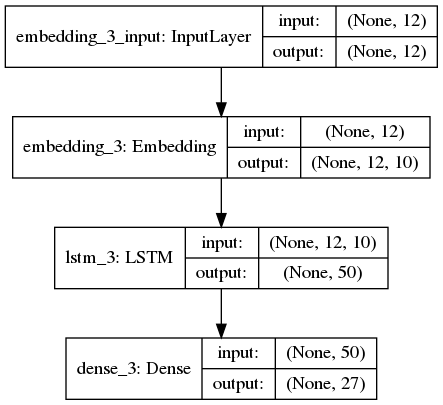

In [86]:
#model plot
plot_model(model, to_file= 'model.png' , show_shapes=True)

In [87]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

/home/hasan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
 - 0s - loss: 3.2963 - accuracy: 0.0714
Epoch 2/500
 - 0s - loss: 3.2952 - accuracy: 0.0714
Epoch 3/500
 - 0s - loss: 3.2937 - accuracy: 0.0357
Epoch 4/500
 - 0s - loss: 3.2922 - accuracy: 0.0357
Epoch 5/500
 - 0s - loss: 3.2907 - accuracy: 0.0714
Epoch 6/500
 - 0s - loss: 3.2891 - accuracy: 0.0714
Epoch 7/500
 - 0s - loss: 3.2873 - accuracy: 0.0714
Epoch 8/500
 - 0s - loss: 3.2856 - accuracy: 0.0714
Epoch 9/500
 - 0s - loss: 3.2836 - accuracy: 0.0714
Epoch 10/500
 - 0s - loss: 3.2816 - accuracy: 0.0714
Epoch 11/500
 - 0s - loss: 3.2794 - accuracy: 0.0714
Epoch 12/500
 - 0s - loss: 3.2770 - accuracy: 0.0714
Epoch 13/500
 - 0s - loss: 3.2744 - accuracy: 0.0714
Epoch 14/500
 - 0s - loss: 3.2716 - accuracy: 0.0714
Epoch 15/500
 - 0s - loss: 3.2686 - accuracy: 0.0714
Epoch 16/500
 - 0s - loss: 3.2652 - accuracy: 0.0714
Epoch 17/500
 - 0s - loss: 3.2615 - accuracy: 0.0714
Epoch 18/500
 - 0s - loss: 3.2574 - accuracy: 0.0714
Epoch 19/500
 - 0s - loss: 3.2529 - accuracy: 0.0714
Ep

### predicting sequence

In [88]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding= 'pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

In [89]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Hasan' , 4))
print(generate_seq(model, tokenizer, max_length-1, 'Moni' , 4))

Hasan completed name is hasan
Moni completed name is b
